In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
creditcard = pd.read_csv("Datasets/creditcard.csv")

In [5]:
creditcard


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
creditcard.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
creditcard.duplicated().any()

True

In [8]:
creditcard['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

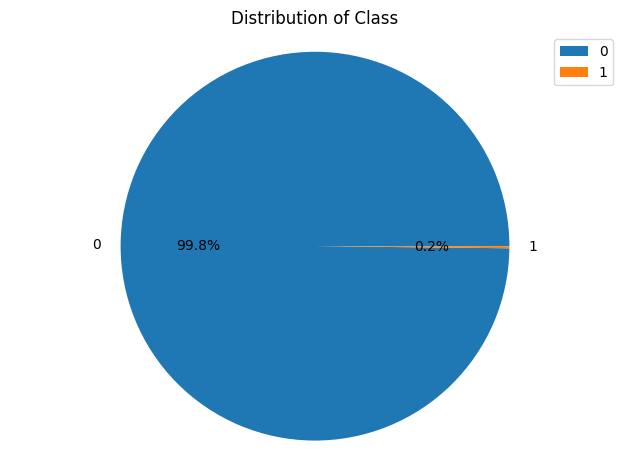

In [9]:
plt.pie(creditcard['Class'].value_counts() , labels=creditcard['Class'].value_counts().index , autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.title("Distribution of Class")
plt.tight_layout()

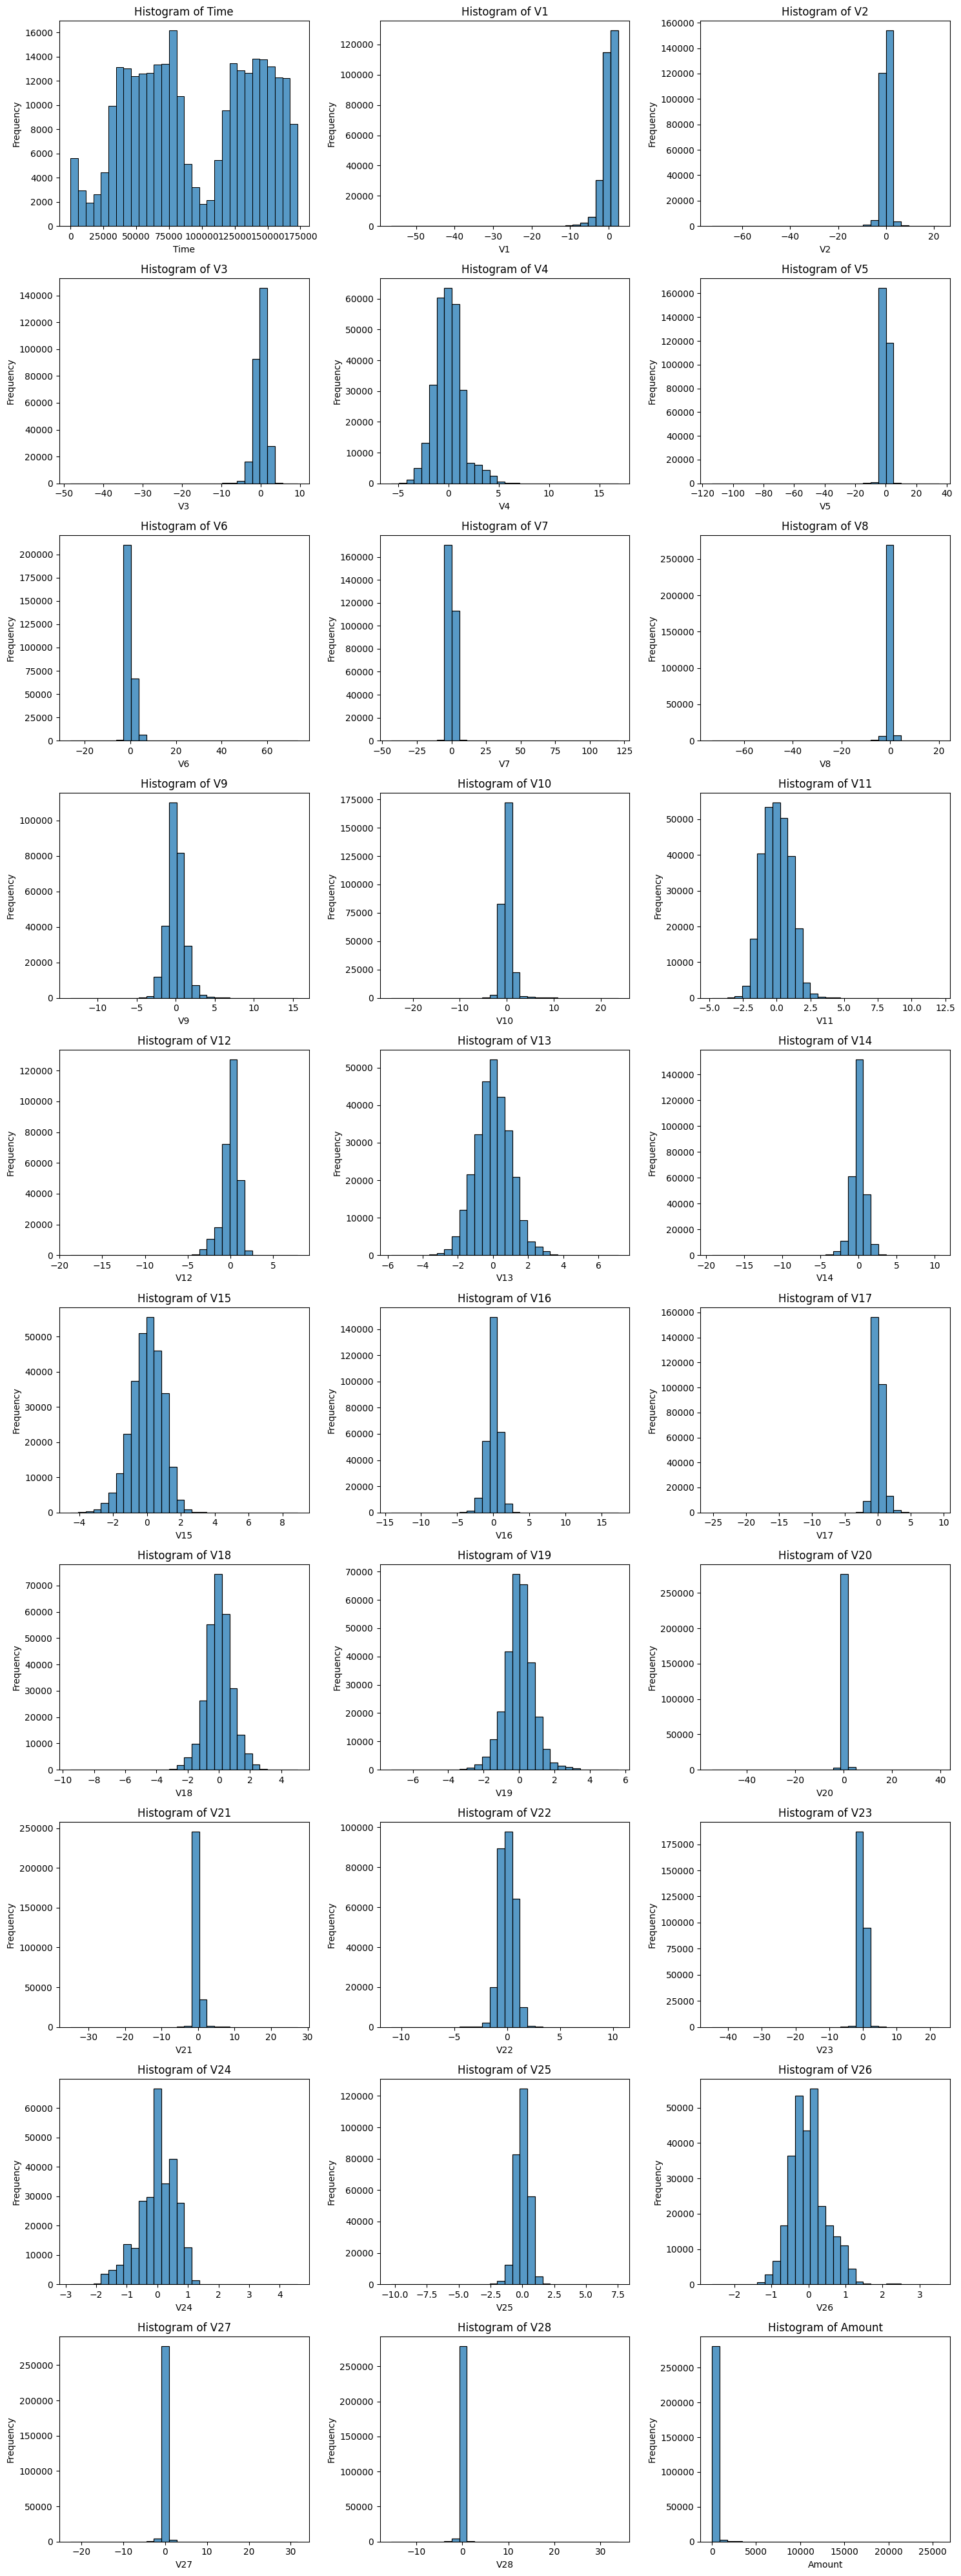

In [10]:
features = creditcard.columns[:-1]

fig , axes = plt.subplots(10 ,3,figsize=(15, 40) )

axes = axes.flatten()

for i , feature in enumerate(features):
    sns.histplot(data=creditcard[feature] , ax=axes[i]  ,bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    plt.tight_layout()


In [11]:
def log_transform_skew(column):
    return np.where(column >= 0 , np.log1p(column) , -np.log1p(-column) )


In [12]:
creditcard_transformed = creditcard.copy()

In [13]:
skewness_before = creditcard_transformed.skew()

In [14]:
for col in features:
    if abs(creditcard_transformed[col].skew()) > 0.75:
        creditcard_transformed[col] = log_transform_skew(creditcard[col])
        



c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
skewness_after = creditcard_transformed.skew()

comparison = pd.DataFrame({
    'skewness_before' : skewness_before,
    'skewness_after' : skewness_after
})

comparison

,skewness_before,skewness_after
Time,-0.035568,-0.035568
V1,-3.280667,-0.364893
V2,-4.624866,-0.310128
V3,-2.240155,-0.315192
V4,0.676292,0.676292
V5,-2.425901,0.139077
V6,1.826581,0.804345
V7,2.553907,-0.112666
V8,-8.521944,-0.912642
V9,0.554680,0.554680


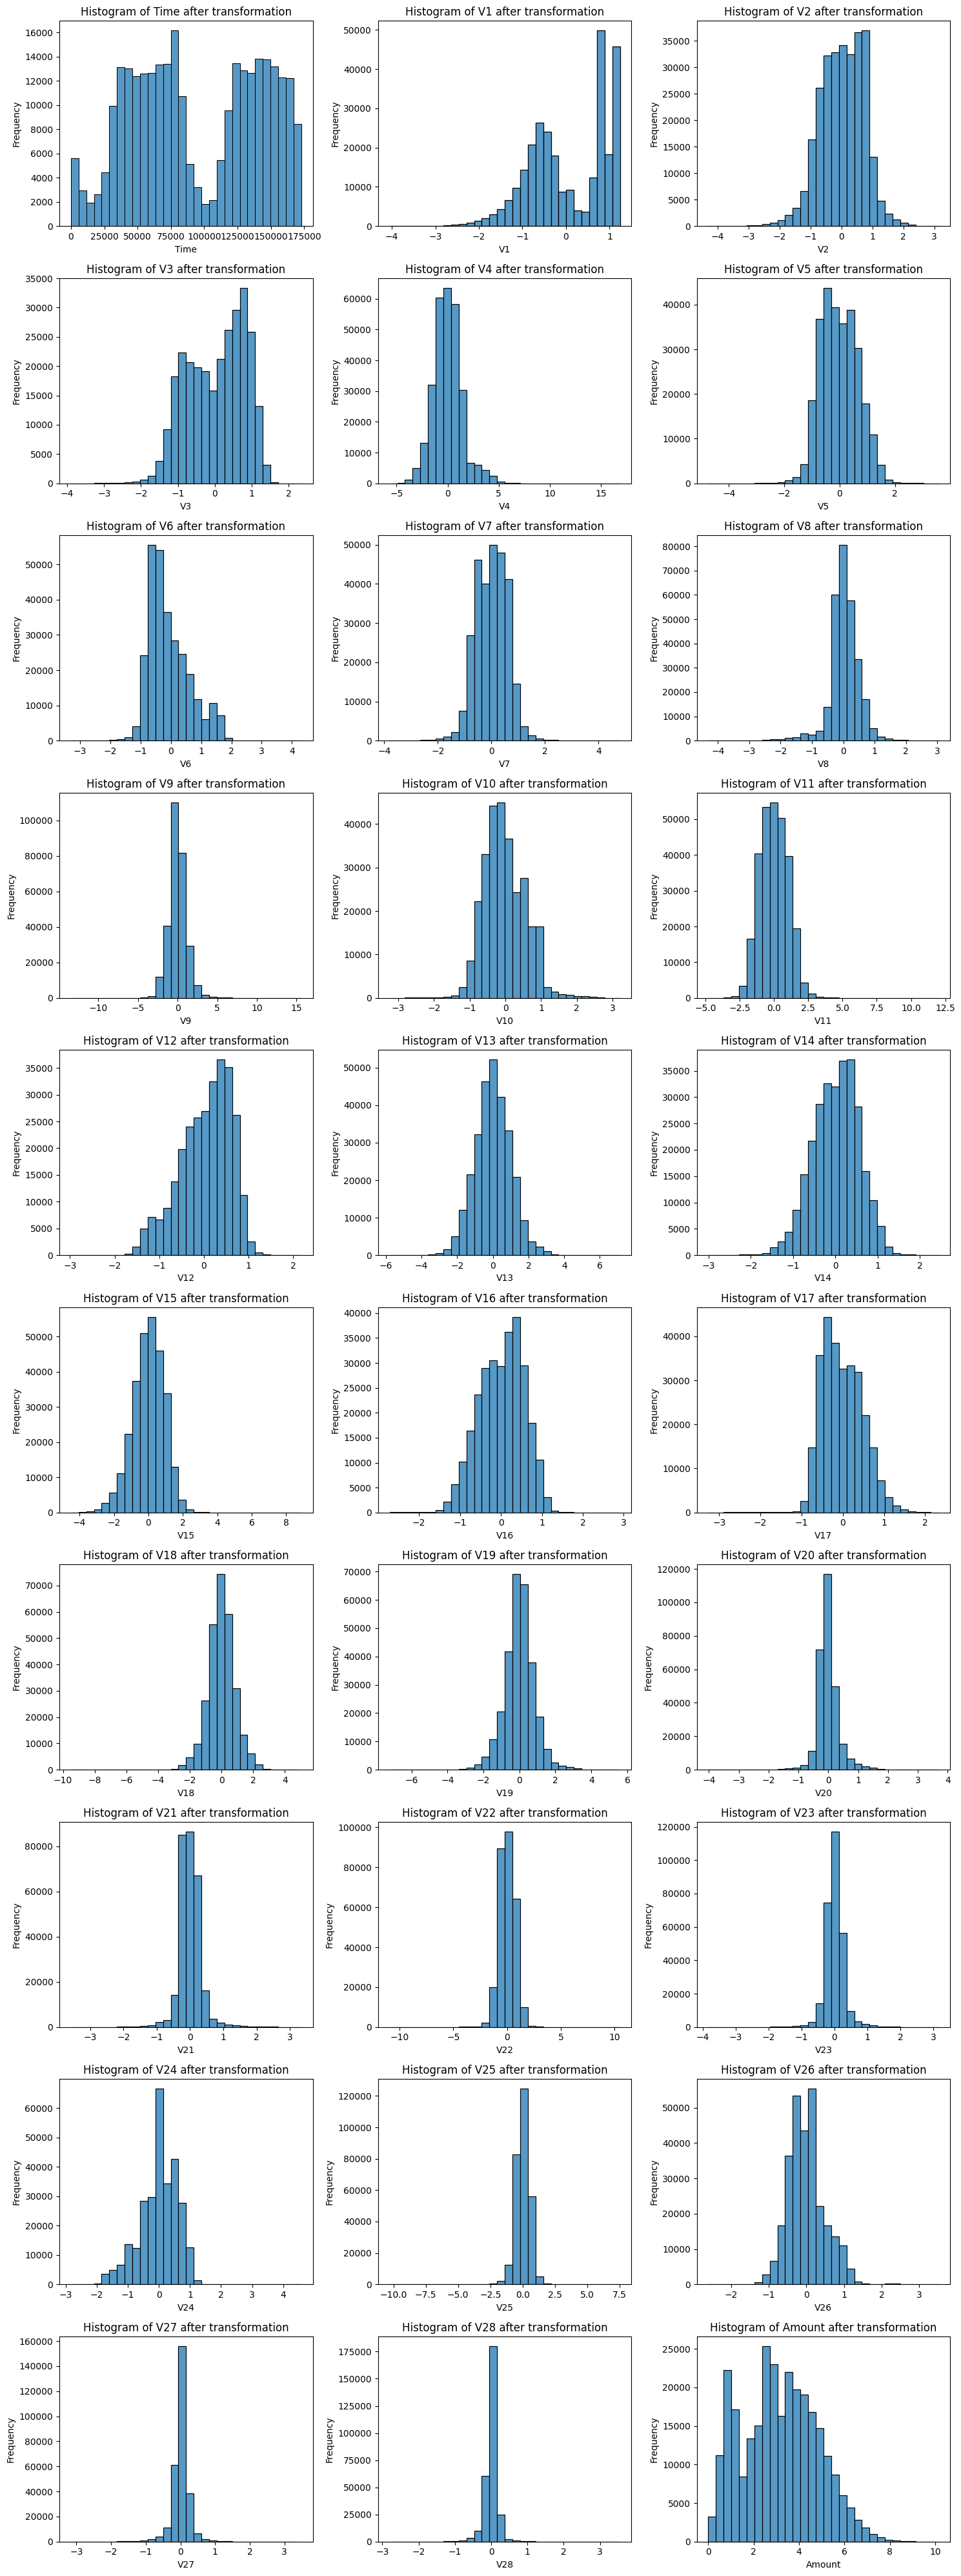

In [16]:
fig , axes = plt.subplots(10 ,3,figsize=(15, 40) )

axes = axes.flatten()

for i , feature in enumerate(features):
    sns.histplot(data=creditcard_transformed[feature] , ax=axes[i]  ,bins=30)
    axes[i].set_title(f'Histogram of {feature} after transformation')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    plt.tight_layout()

In [17]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [18]:
x = creditcard_transformed[features]
y = creditcard_transformed['Class']

In [19]:
X_scaled = standardScaler.fit_transform(x)

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [21]:
iForest = IsolationForest(contamination=0.05, random_state=101)

In [22]:
iso_preds = iForest.fit_predict(X_scaled)

In [23]:
iso_preds = [1 if x == -1 else 0 for x in iso_preds]

In [24]:
from sklearn.metrics import * 

In [25]:
print(classification_report(y , iso_preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.85      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.90      0.52    284807
weighted avg       1.00      0.95      0.97    284807



In [32]:
isoF_fpr, isoF_tpr, isoF_thresold = roc_curve(y, iso_preds)

(-0.01, 1.0, 0.0, 1.0)

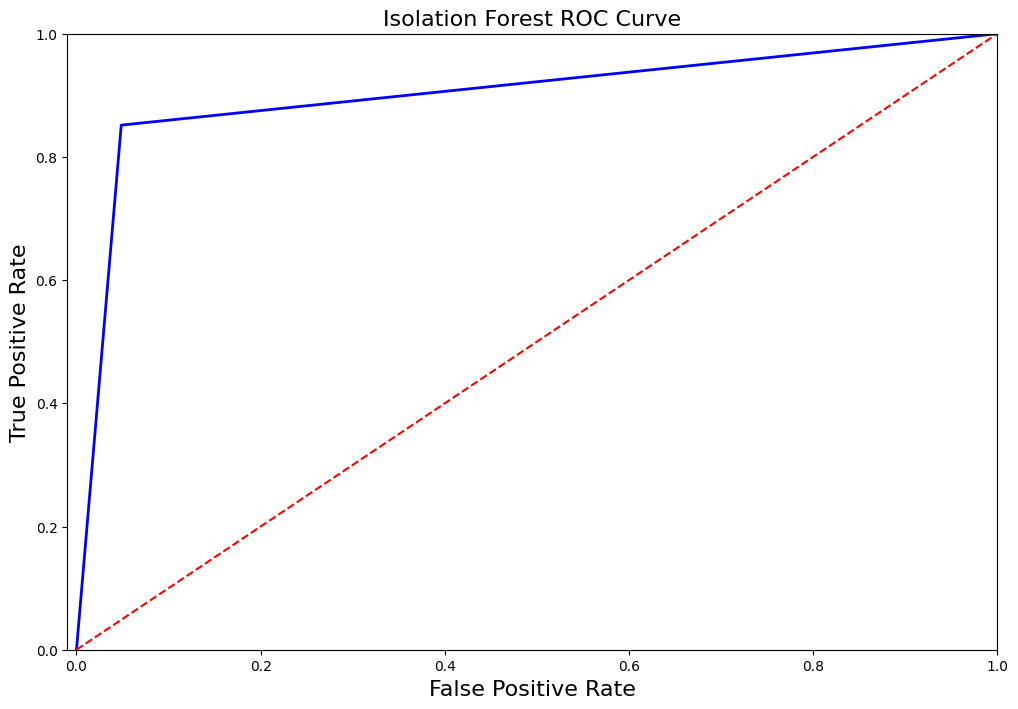

In [44]:
plt.figure(figsize=(12,8))
plt.title('Isolation Forest ROC Curve', fontsize=16)
plt.plot(isoF_fpr, isoF_tpr, 'b-', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])

## DBSCAN Clustering


In [39]:
# DBSCAN parameters:
# eps: Maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
db = DBSCAN(eps=0.5, min_samples=5)

db_labels = db.fit_predict(X_scaled)

In [42]:
# Convert -1 (anomalies) to 1 (fraud) and others to 0 (non-fraud)
dbscan_preds = [1 if x == -1 else 0 for x in db_labels]

In [43]:
print(classification_report(y, dbscan_preds))
roc_auc = roc_auc_score(y, dbscan_preds)
print("ROC AUC Score: ", roc_auc)
print("Confusion Matrix:")
print(confusion_matrix(y, dbscan_preds))

              precision    recall  f1-score   support

           0       1.00      0.17      0.28    284315
           1       0.00      0.97      0.00       492

    accuracy                           0.17    284807
   macro avg       0.50      0.57      0.14    284807
weighted avg       1.00      0.17      0.28    284807

ROC AUC Score:  0.568390228746914
Confusion Matrix:
[[ 46979 237336]
 [    14    478]]
